In [26]:
# cartpole  using Hill Climbing + noise factor increases eery iteration the agent does not improve
# Start with Random Initialization, and add a little noise every integrtion and keep the new set if it improves

# The problem consists of balancing a pole connected with one joint on top of a moving cart.
# In CartPole's environment, there are four observations at any given state, 
# representing information such as  [Poisition of Cart, Velocity of Cart, angle of Pole, rotation rate of Pole]
# Using these observations, the agent needs to decide on one of two possible actions: move the cart left or right.

In [27]:
import gym
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
# EPISODE is one sequence of states, actions and rewards, which ends with terminal state.( start of game till end of game)
# TIMESTEP is  a single state , action and reward

EPISODE=4000
TIMESTEP=2000
#env.render() 

In [35]:
# 4 random numbers between [-1,1] for cartpole-v0 parameters
# retuns a numpy array of length of 4.

def randomSearch():
    return np.random.uniform(-1,1,4)

In [36]:
def runEpisode(env,parameters,timestep):
    observation=env.reset()
    done=False
    tr=0
    
    for j in range(timestep):
            #env.render()
            
            action = 0 if np.matmul(parameters,observation) < 0 else 1
            
            observation, reward,done,info = env.step(action)
            
            tr += reward
            
            #print(observation)
            #print(reward)
          
            if done or tr >=200:    
                 break
                
    return tr
                

In [37]:
# Create an EPISODES Loop ( Note we reset the env on each episode)
# In each EPISODE, we create a TIMESTEP loop to take action & observation, until this episode terminates, or we reach the end of TIMESTEP .
# Observation is a [Poisition of Cart, Velocity of Cart, angle of Pole, rotation rate of Pole]

In [38]:
def main():
   
    env = gym.make('CartPole-v1')
    
    totalRewards=[]
    parameters = randomSearch()
    bestReward=0
    
    noise=1.0001
    noiseAdd = 0.1
   
    for i in range(EPISODE):
        
        newParameters = parameters +(randomSearch() * noise)
        reward = runEpisode(env,newParameters,TIMESTEP)
        totalRewards.append(reward)
        
        if reward >=200:
            print("200 achieved in episode {}".format(i))
            
        if reward > bestReward:
            bestReward=reward
            bestParameters=newParameters
            parameters= newParameters
        else:
            noise += noiseAdd   # here we are increasing the noise, as agent behaviour has not improved.
                
    print("")
    print("")
    print("Average reward after {0} consecutive trials: {1}".format(EPISODE,sum(totalRewards)/EPISODE))
    print("Best reward {}".format(bestReward))
    print("Best Parameters {}".format(bestParameters))
    
     
    env.close()
    env.env.close()  # hack solution to environments not closing
    plotChart(totalRewards)

In [39]:
def plotChart(rew):
  
    fig=plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(1,len(rew)+1),rew)
    plt.ylabel("Rewards")
    plt.xlabel("Episode #")
    plt.show()
    

200 achieved in episode 8
200 achieved in episode 14
200 achieved in episode 17
200 achieved in episode 18
200 achieved in episode 22
200 achieved in episode 26
200 achieved in episode 27
200 achieved in episode 28
200 achieved in episode 38
200 achieved in episode 45
200 achieved in episode 50
200 achieved in episode 60
200 achieved in episode 70
200 achieved in episode 84
200 achieved in episode 89
200 achieved in episode 107
200 achieved in episode 118
200 achieved in episode 149
200 achieved in episode 150
200 achieved in episode 159
200 achieved in episode 192
200 achieved in episode 222
200 achieved in episode 230
200 achieved in episode 233
200 achieved in episode 285
200 achieved in episode 286
200 achieved in episode 326
200 achieved in episode 331
200 achieved in episode 353
200 achieved in episode 367
200 achieved in episode 373
200 achieved in episode 382
200 achieved in episode 385
200 achieved in episode 387
200 achieved in episode 395
200 achieved in episode 413
200 achi

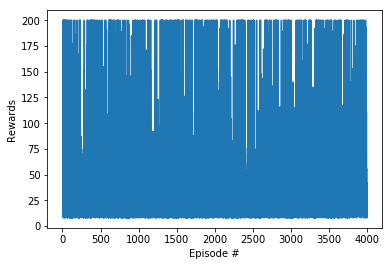

In [40]:
if __name__=="__main__":
    main()
